<a href="https://colab.research.google.com/github/EmmanueleVilla/Tensorflow---Serie-youtube/blob/main/Tensorflow%20%234%20-%20Preparazione%20dataset%20immagini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.emmanuelevilla.com/datasets/food-6.zip

--2022-08-16 09:15:31--  https://www.emmanuelevilla.com/datasets/food-6.zip
Resolving www.emmanuelevilla.com (www.emmanuelevilla.com)... 188.68.50.253
Connecting to www.emmanuelevilla.com (www.emmanuelevilla.com)|188.68.50.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 293676082 (280M) [application/zip]
Saving to: ‘food-6.zip’

food-6.zip          100%[===================>] 280.07M  32.1MB/s    in 10s     

2022-08-16 09:15:42 (27.9 MB/s) - ‘food-6.zip’ saved [293676082/293676082]



In [ ]:
!unzip -q food-6.zip -d food-6

In [ ]:
!rm food-6.zip

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import tensorflow as tf
import os, random

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


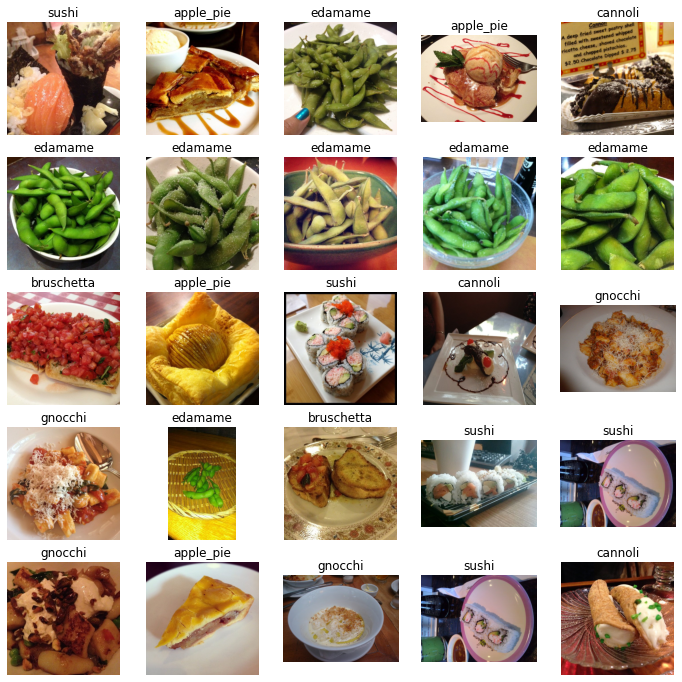

In [ ]:
plt.figure(figsize=(12,12))
root = "food-6"
for i in range(25):
  random_folder = random.choice(os.listdir(root))
  filename = random.choice(os.listdir(f"{root}/{random_folder}"))
  path = f"{root}/{random_folder}/{filename}"
  img = mpimg.imread(path)
  plt.subplot(5, 5, i + 1)
  plt.imshow(img)
  plt.axis("off")
  plt.title(random_folder)
plt.show()

In [ ]:
full_data = tf.keras.utils.image_dataset_from_directory(
    root,
    image_size=(256,256),
    crop_to_aspect_ratio=True,
    seed=42
)
full_data, len(full_data)

Found 6000 files belonging to 6 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 188)

In [ ]:
train_size = int(0.7 * len(full_data))
val_size = int(0.15 * len(full_data))
test_size = int(0.15 * len(full_data))

train_data = full_data.take(train_size)
test_data = full_data.skip(train_size)
val_data = test_data.skip(test_size)
test_data = test_data.take(test_size)

len(train_data), len(test_data), len(val_data)

(131, 28, 29)

In [ ]:
print(full_data.class_names)

['apple_pie', 'bruschetta', 'cannoli', 'edamame', 'gnocchi', 'sushi']


In [ ]:
train_data_prefetched = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_data_prefetched = val_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data_prefetched = test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
train_data_prefetched

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

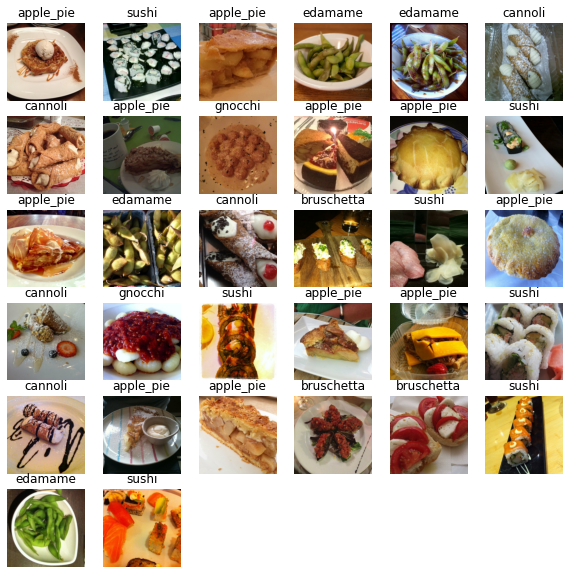

In [ ]:
plt.figure(figsize=(10,10))
class_names = full_data.class_names
for images, labels in train_data.take(1):
  for i in range(32):
    ax = plt.subplot(6, 6, i +1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")